# Count 1s in a sequence using simple RNN

In this example, we'll implement a basic RNN from scratch (without using any NN libraries). We'll train the network to count the number of 1s in a sequence of 0s and 1s. 

Let's start with the imports:

In [1]:
import numpy as np

We'll continue by defining a single forward step of the RNN:

In [2]:
def step(s, x, U, W):
    return x * U + s * W

Next, we'll define the full sequence processing routine:

In [3]:
def forward(x, U, W):
    # Number of samples in the mini-batch
    number_of_samples = len(x)

    # Length of each sample
    sequence_length = len(x[0])

    # Initialize the state activation for each sample along the sequence
    s = np.zeros((number_of_samples, sequence_length + 1))

    # Update the states over the sequence
    for t in range(0, sequence_length):
        s[:, t + 1] = step(s[:, t], x[:, t], U, W)  # step function

    return s

Let's continue by defining the backpropagation through time routine for a sequence:

In [4]:
def backward(x, s, y, W):
    sequence_length = len(x[0])

    # The network output is just the last activation of sequence
    s_t = s[:, -1]

    # Compute the gradient of the output w.r.t. MSE cost function at final state
    gS = 2 * (s_t - y)

    # Set the gradient accumulations to 0
    gU, gW = 0, 0

    # Accumulate gradients backwards
    for k in range(sequence_length, 0, -1):
        # Compute the parameter gradients and accumulate the results.
        gU += np.sum(gS * x[:, k - 1])
        gW += np.sum(gS * s[:, k - 1])

        # Compute the gradient at the output of the previous layer
        gS = gS * W

    return gU, gW

Then, let's implement the `train` procedure:

In [5]:
def train(x, y, epochs, learning_rate=0.0005):
    # Set initial parameters
    weights = (-2, 0)  # (U, W)

    # Accumulate the losses and their respective weights
    losses = list()
    gradients_u = list()
    gradients_w = list()

    # Perform iterative gradient descent
    for i in range(epochs):
        # Perform forward and backward pass to get the gradients
        s = forward(x, weights[0], weights[1])

        # Compute the loss
        loss = (y[0] - s[-1, -1]) ** 2

        # Store the loss and weights values for later display
        losses.append(loss)

        gradients = backward(x, s, y, weights[1])
        gradients_u.append(gradients[0])
        gradients_w.append(gradients[1])

        # Update each parameter `p` by p = p - (gradient * learning_rate).
        # `gp` is the gradient of parameter `p`
        weights = tuple((p - gp * learning_rate) for p, gp in zip(weights, gradients))

    print(weights)

    return np.array(losses), np.array(gradients_u), np.array(gradients_w)

We'll continue with the `plot_training` function that plots the results, returned from the `train` functions:

In [9]:
def plot_training(losses, gradients_u, gradients_w):
    import matplotlib.pyplot as plt

    # remove nan and inf values
    losses = losses[~np.isnan(losses)][:-1]
    gradients_u = gradients_u[~np.isnan(gradients_u)][:-1]
    gradients_w = gradients_w[~np.isnan(gradients_w)][:-1]

    # plot the weights U and W
    fig, ax1 = plt.subplots(figsize=(10, 6.8))

    ax1.set_ylim(-3, 600)
    ax1.set_xlabel('epochs')
    ax1.plot(gradients_u, label='grad U', color='blue', linestyle=':')
    ax1.plot(gradients_w, label='grad W', color='red', linestyle='--')
    ax1.legend(loc='upper left')

    # instantiate a second axis that shares the same x-axis
    # plot the loss on the second axis
    ax2 = ax1.twinx()

    # uncomment to plot exploding gradients
    ax2.set_ylim(-3, 200)
    ax2.plot(losses, label='Loss', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    ax2.legend(loc='upper right')

    fig.tight_layout()

    plt.show()

Finally, let's train the network to learn a single short binary sequence, where `x` is the sequence and `y` is the label:

(-2.088692479228279, -0.7529413189879612)


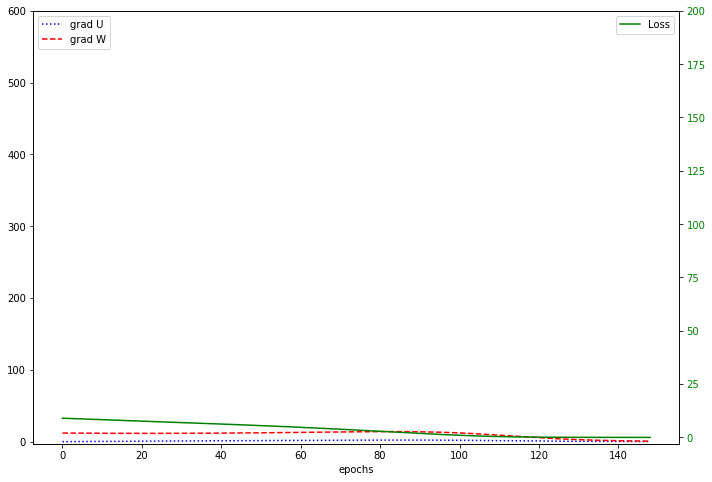

In [10]:
x = np.array([[0, 0, 0, 0, 1, 0, 1, 0, 1, 0]])
y = np.array([3])

losses, gradients_u, gradients_w = train(x, y, epochs=150)
plot_training(losses, gradients_u, gradients_w)

To demonstrate the vanishing gradients problem, we'll train the network using longer sequence:

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply


(nan, nan)


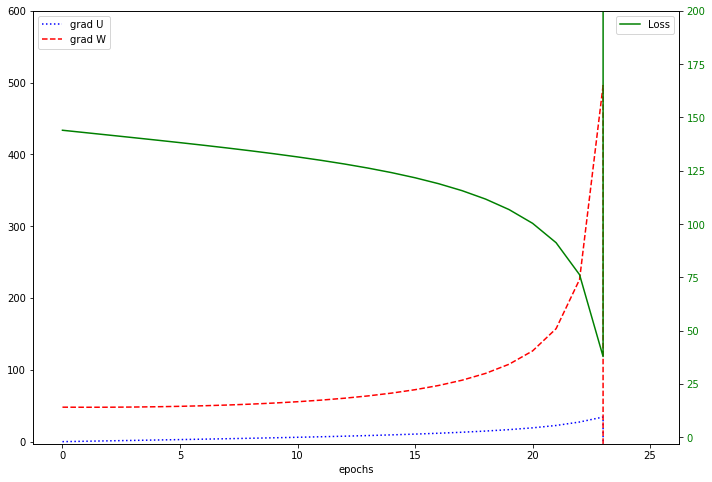

In [11]:
x = np.array([[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]])
y = np.array([12])

losses, gradients_u, gradients_w = train(x, y, epochs=150)
plot_training(losses, gradients_u, gradients_w)